## Red Wine Quality

In [19]:
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [81]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

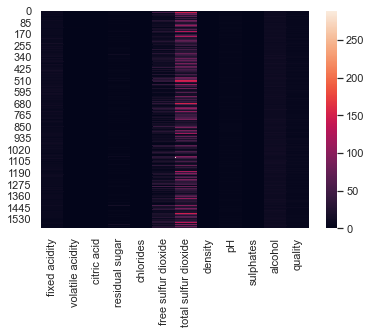

In [28]:
sns.heatmap(data=data)

<AxesSubplot:>

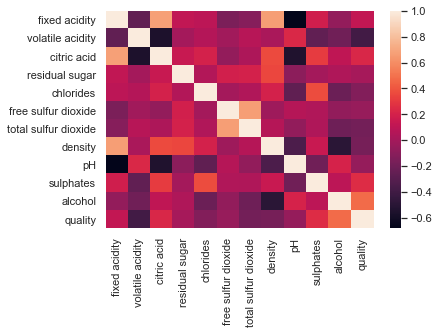

In [27]:
sns.heatmap(data=data.corr())

In [87]:
data['free sulfur dioxide'].isna().value_counts()
data['chlorides'].isna().value_counts()

False    1599
Name: chlorides, dtype: int64

In [92]:
X = data.iloc[:,:-1]
y = data['quality'] > 5

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler_X_train=scaler.fit_transform(X_train)

scaler_X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [108]:
scaler_X_test= scaler.transform(X_test)

scaler_X_test

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01, ...,
        -4.65392578e-01, -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01, ...,
         5.08915214e-01, -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01, ...,
        -2.05577167e-01,  1.83329452e+00, -4.92358280e-01],
       ...,
       [-1.37449586e-02,  3.87494284e-01, -1.15015218e-01, ...,
        -1.04997725e+00, -7.44964886e-01, -5.87389780e-01],
       [ 2.76350785e-01, -1.45397070e+00,  6.01568807e-01, ...,
        -1.04997725e+00,  1.71749571e-01,  7.43051230e-01],
       [ 4.50408230e-01,  1.30822677e+00, -1.18989125e+00, ...,
        -1.40623314e-01, -6.87670232e-01, -6.82421281e-01]])

In [113]:
from sklearn.svm import SVC

svc_clf = SVC(kernel='poly')

svc_clf.fit(scaler_X_train,y_train)

SVC(kernel='poly')

In [114]:
y_pred = svc_clf.predict(scaler_X_test)

In [115]:
confusion_matrix(y_test,y_pred)

array([[111,  30],
       [ 45, 134]], dtype=int64)

In [116]:
accuracy_score(y_test,y_pred)*100

76.5625